In [1]:
from importlib import reload
from dataset import Dataset
import botr
from botr import BOTR_Layer, BOTR
from config import GENERATOR_CONFIG_DEFAULT
from coco_utils import all_category_names
from dataset import get_annotation_supercategory

In [2]:
dataset = Dataset()

=> loading coco asset: dataset/coco-safe-licenses.pickle
=> loading coco object - dataset/annotations/captions_train2017.json
loading annotations into memory...
Done (t=0.94s)
creating index...
index created!


In [9]:
allowedCateg = all_category_names(
  exclude=['person', 'other', 'animal', 'vehicle'])
# allowedCateg = ['outdoor']
# allowedCateg = random.sample(allowedCateg, random.randint(1,len(allowedCateg)))
# allowedCateg = ["sky"]

blendConfig = {
  "use_blending" : False,
  "pyr_kernel_size" : 9,
  "pyr_kernel_sigma" : 3,
  "mask_kernel_size" : 7,
  "mask_kernel_sigma" : 1.,
  "max_depth" : 5,
  "blur_masks" : False,
  "blur_iters" : 1,
  "plot_levels" : False,
  "level_step_size" : 4
}

config = {
  # average size of each patch (1 being mean of distribution)
  'avgPatchSize' : 0.1,
  # average size variance of each patch added
  'avgPatchVariance' : 0.1,
  # minimum area of a patch added, expressed as percentage px after masking
  'minPatchArea' : 0.0001, 
  # maximim area of a patch added, expressed as percentage px after masking
  'maxPatchArea' : 0.8, 
  # target percentage of pixels to fill
  'targetFill' : 0.99,
  # output image size
  'outputSize' : (128, 128),
  # prevent supercategories from appearing
  'allowedCategories' : allowedCateg,
  # choose either "stuff_ann", "instance_ann", or "any"
  'ann_key' : "any",
  # image blending options
  'image_blending' : blendConfig,
  # match historgrams on a channel basis
  'multichannelColorMatching' : -1,
  # add jpeg decimation
  'jpeg_quality' : 100,
  # normalize histograms when matching
  'normalizeHistogram' : False,
  # determines channel for matching
  'histogramChannelAxis' : -1,
  # reference layer for normalizing (overrides auto)
  'refLayerHistogram' : None,
    # use equalize_adapthist (slower)
  'adaptiveHistogram' : False,
  # kernel size for equalize_adapthist, none=1/8*width
  'adaptiveHistKernel' : None,
  # clip limit for adaptive hist between 0, 1
  'adaptiveHistClip' : 0.2,
  # ====== Language Model ========
   # choose 'markov' or 'lstm'
  'descriptionModel' : "markov",
  # restrict corpus for description model
  'restrictCorpus' : True,
  # choose 'default'
  'titleModel' : "default"
}

In [ ]:
import botr
reload(botr)
from botr import BOTR_Layer, BOTR

In [15]:
botrGen = BOTR(config, dataset)

[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape


100%|██████████| 150/150 [00:04<00:00, 36.75it/s]


removed 81 layers from canvas
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape


100%|██████████| 69/69 [00:02<00:00, 24.19it/s]


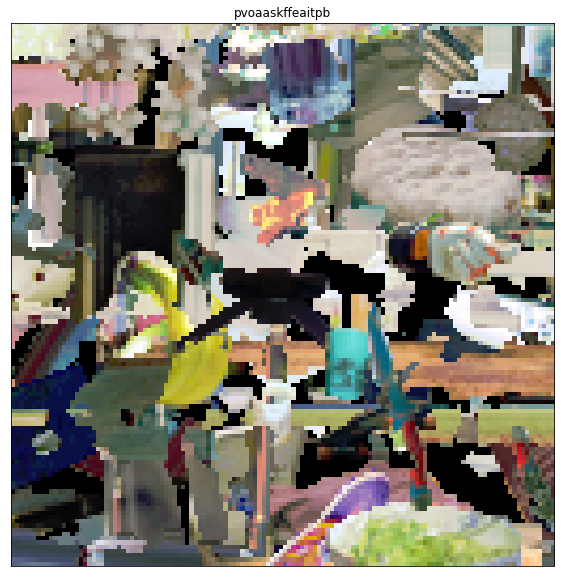

Description: . A man jumps and reaches for a frisbee scene


In [16]:
import random
areaTarget = 0.06
tolerance = 0.001
layers = 150
exclude=['person', 'other', 'animal', 'vehicle']

while len(botrGen.layers) < layers:
    example = dataset.get_coco_example()
    if example.get_num_annotations() == 0:
        continue
    target = random.random() * areaTarget
    ann, area = example.closest_ann_area(target)
    if get_annotation_supercategory(ann) in exclude:
        continue
    if abs(area - target) < tolerance:
        botrGen.append_layer(BOTR_Layer(botrGen, example, ann))


botrGen.generate(config)
# botrGen.display()

# cleanup overlapped images not being seen
botrGen.layers.clean_invisible(100)
botrGen.generate(config)
botrGen.display()


after the fact, remove layers that aren't covering much area

removed 50 layers from canvas
No active layers, unable to generate image


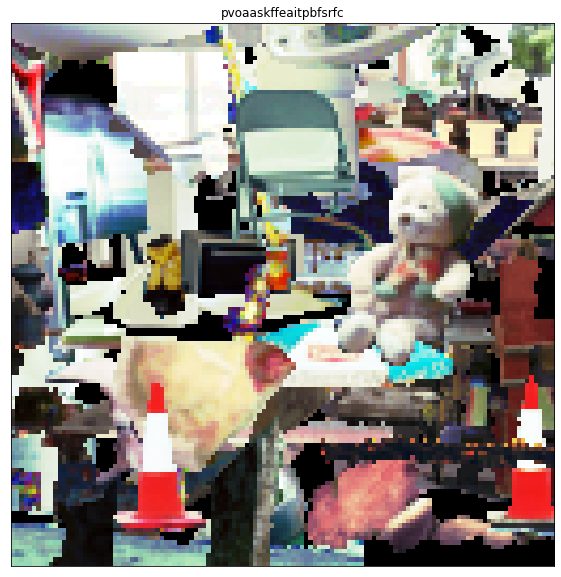

Description: tricks on a busy city A


In [13]:
botrGen.layers.clean_invisible(3000)
botrGen.generate(config)
botrGen.display()

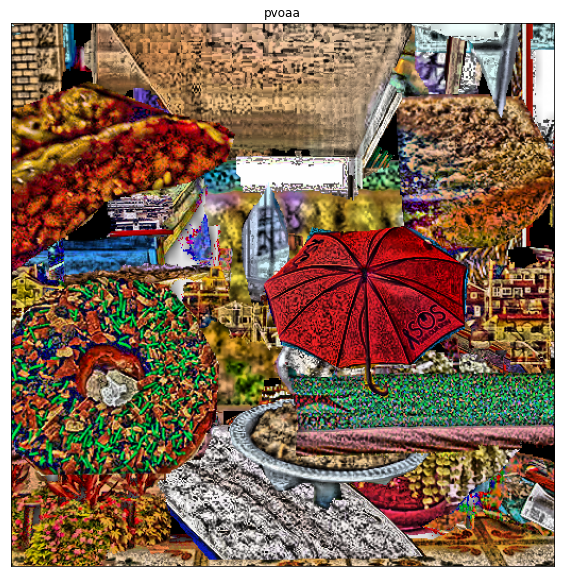

Description: red shirt sprinkling cheese on a patio . This looks like the front to
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape


100%|██████████| 46/46 [00:29<00:00,  1.54it/s]


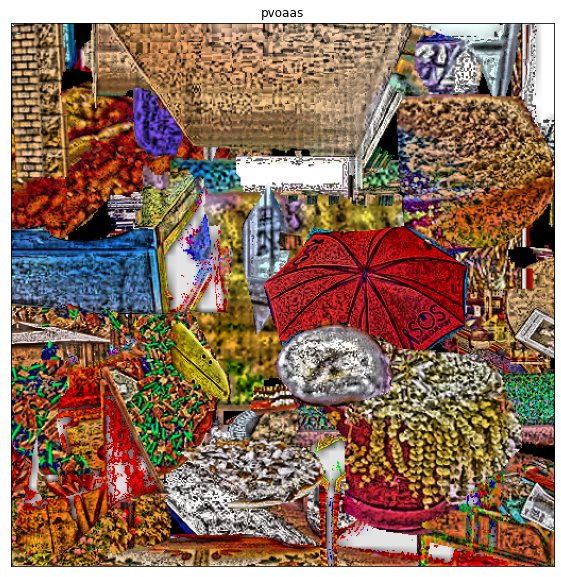

Description: a small scooter . The model train set is equipped with a pizza , ,
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape


100%|██████████| 46/46 [00:18<00:00,  2.44it/s]


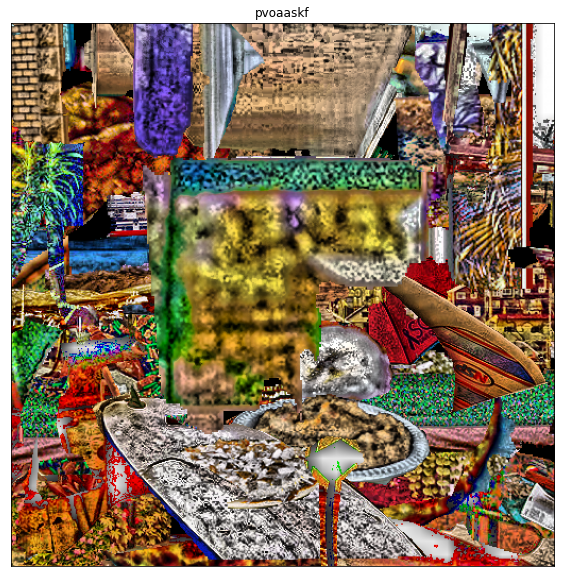

Description: meat sits next to building


In [29]:
for i in range(10):
  config['adaptiveHistogram'] = True
  # kernel size for equalize_adapthist, none=1/8*width
  config['adaptiveHistKernel'] = random.randint(3,19)
  # clip limit for adaptive hist between 0, 1
  config['adaptiveHistClip'] = 0.9
  botrGen.layers.shuffle_order()
  botrGen.generate(config)
  botrGen.display()

In [ ]:
config["image_blending"] = {
  "use_blending" : False,
  "pyr_kernel_size" : 9,
  "pyr_kernel_sigma" : 1,
  "mask_kernel_size" : 9,
  "mask_kernel_sigma" : 1.,
  "max_depth" : 7,
  "blur_masks" : True,
  "blur_iters" : 1,
  "plot_levels" : False,
  "level_step_size" : 4
}
config["adaptiveHistogram"] = True
config["outputSize"] = [256,256]
botrGen.generate(config)
botrGen.display()

In [ ]:
botrGen[-2].display()

In [ ]:
for i in range(100):
    for layer in botrGen.layers:
        layer.shuffle_ann()

    botrGen.generate(config)
    # botrGen.display()


In [ ]:
generated = iter(botrGen)

for g in generated:
    g.display()

In [7]:
for i in range(len(botrGen.layers)):
    botrGen.generate(config)
    botrGen.layers.remove_smallest_n(1)
    print(f'botrgen layers size {len(botrGen.layers)}')

[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape


100%|██████████| 111/111 [00:12<00:00,  8.61it/s]


botrgen layers size 110
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape


100%|██████████| 110/110 [00:19<00:00,  5.59it/s]


botrgen layers size 109
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape


100%|██████████| 109/109 [00:18<00:00,  5.87it/s]


botrgen layers size 108
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape


100%|██████████| 108/108 [00:19<00:00,  5.56it/s]


botrgen layers size 107
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape
[!] Histogram error: all input arrays must have the same shape


  4%|▎         | 4/107 [00:00<00:18,  5.71it/s]

KeyboardInterrupt: 

In [8]:
botrGen[0].image.save(fp="out/reduction.gif", format='GIF', 
        append_images=[g.image for g in iter(botrGen)],
         save_all=True, duration=200, loop=0)

In [31]:
botrGen.generatedItem.display_categories()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
for layer in botrGen.layers:
    hist, img = layer.dominant_color(config["outputSize"])
    print(np.max(hist))
    print(np.mean(hist))
    print(np.median(hist))
    plt.imshow(img)
    plt.show()
    plt.plot(hist[:, 10:-10].T)
    # plt.hist(hist[0, hist[0, :] > 0.1], color='red')
    # plt.hist(hist[1, hist[1, :] > 0.1], color='green')
    # plt.hist(hist[2, hist[2, :] > 0.1], color='blue')
    plt.show()
